Plotting for Exploratory data analysis (EDA)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Loading The Dataset

In [3]:
from google.colab import files
files=files.upload()

Saving haberman.csv to haberman.csv


1. How Many DataPoints And Features?

In [4]:
haberman=pd.read_csv('haberman.csv')
print(haberman.shape)

(306, 4)


2.What are the Columns names in our Dataset?

In [0]:
print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


3.How many datapoints are present for each class?

In [0]:
haberman['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

Oservation:
Haberman dataset is a imbalanced dataset as number of datapoiunts of class 1
is much higher than class 2.

2-D Scatter Plot

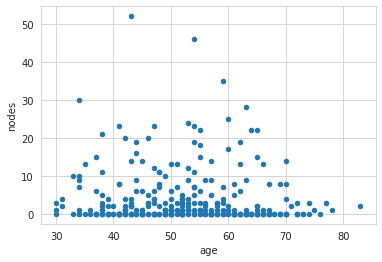

In [0]:
haberman.plot(kind='scatter',x='age',y='nodes')
plt.show()

Observation:
We are getting a scatter plot which tells age varies from 30-82 and year varies from 58-70 ,but we are unable to distinguish which class it is belonging to as all datapoints are same Color.

2-D scatter plot with color-coding for each type/class

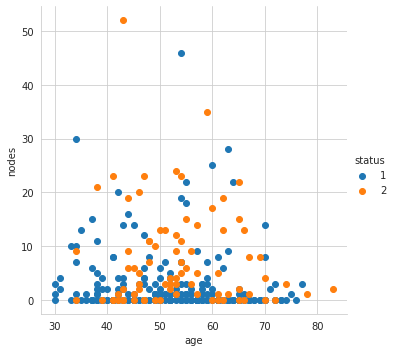

In [0]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.show();

Observation:
Separating Class 1 from Class 2 is harder as they have considerable overlap. We are unable to seprate but we may seprate them using other use other x and y values. So, this is finally our 2-D Scatter plot where we plotted one datapoint taking one x and y value.

Pair Plot

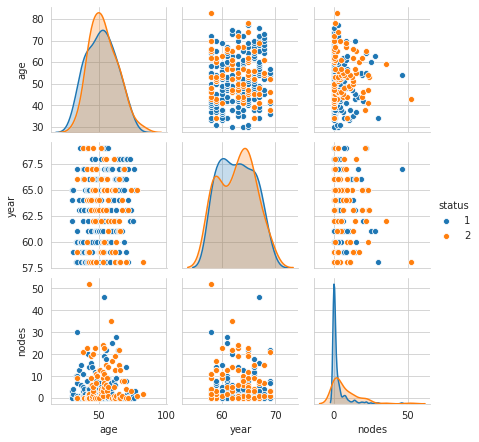

In [0]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status", height=2);
plt.show()

Observation:
When we are using the pair plot we are taking pairs for different datapoints and plotting the graphs. This graph is used to find the best x and y values. Here in our plot the x and y are nodes and nodes because remaining all are colliding so using them we cant classify. Using x-nodes and y-nodes there is best chance of classifying.

1-D Scatter Plot

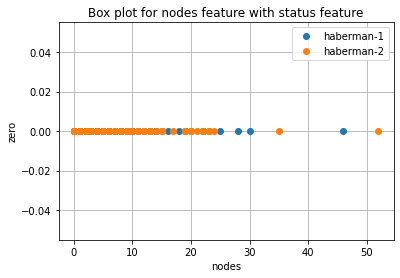

In [20]:
import numpy as np
haberman_1 = haberman.loc[haberman["status"] == 1];
haberman_2 = haberman.loc[haberman["status"] == 2]
plt.plot(haberman_1["nodes"], np.zeros_like(haberman_1['nodes']), 'o',label='haberman-1')
plt.plot(haberman_2["nodes"], np.zeros_like(haberman_2['nodes']), 'o',label='haberman-2')
plt.xlabel('nodes')
plt.ylabel('zero')
plt.legend()
plt.title(" for nodes feature with status feature")
plt.grid(True)
plt.show()

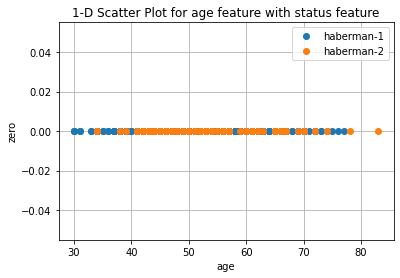

In [21]:
import numpy as np
haberman_1 = haberman.loc[haberman["status"] == 1];
haberman_2 = haberman.loc[haberman["status"] == 2]
plt.plot(haberman_1["age"], np.zeros_like(haberman_1['age']), 'o',label='haberman-1')
plt.plot(haberman_2["age"], np.zeros_like(haberman_2['age']), 'o',label='haberman-2')
plt.xlabel('age')
plt.ylabel('zero')
plt.legend()
plt.title("1-D Scatter Plot for age feature with status feature")
plt.grid(True)
plt.show()

Histogram, PDF, CDF

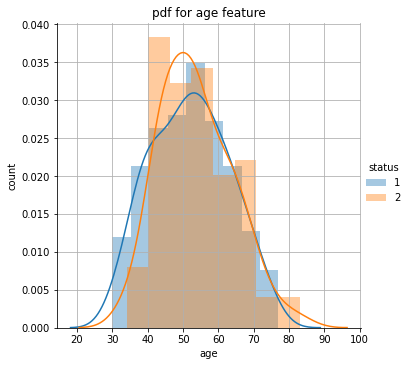

In [7]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.ylabel("count")
plt.title("pdf for age feature")
plt.grid(True)
plt.show()

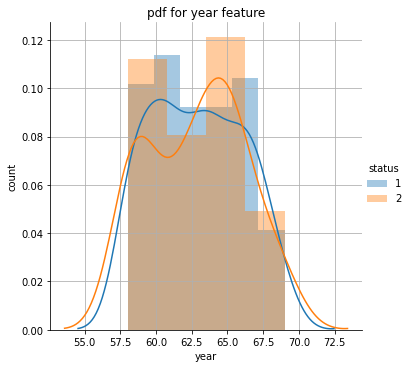

In [6]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.ylabel("count")
plt.title("pdf for year feature")
plt.grid(True)
plt.show()

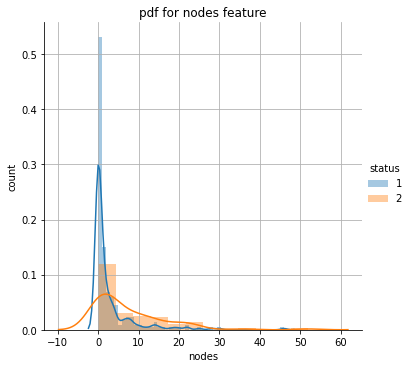

In [8]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.ylabel("count")
plt.title("pdf for nodes feature")
plt.grid(True)
plt.show()

Observation:
We have done univariate analysis to find which of the variable is best suited to build a model that classifies class 1 and class 2.

CDF(Cumulative Distribution Function)

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


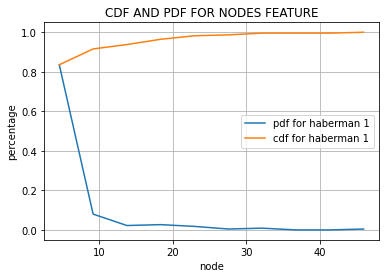

In [10]:
haberman_1 = haberman.loc[haberman["status"] == 1];
haberman_2 = haberman.loc[haberman["status"] == 2];
counts, bin_edges = np.histogram(haberman_1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf for haberman 1');
plt.plot(bin_edges[1:], cdf,label='cdf for haberman 1');
plt.legend()
plt.xlabel('node')
plt.ylabel('percentage')
plt.title('CDF AND PDF FOR NODES FEATURE')
plt.grid(True)
plt.show();

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


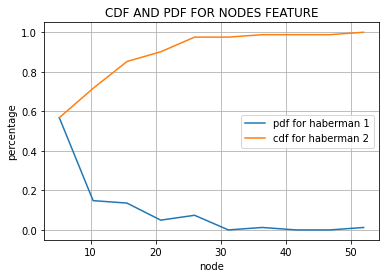

In [11]:
counts, bin_edges = np.histogram(haberman_2['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf for haberman 1');
plt.plot(bin_edges[1:], cdf,label='cdf for haberman 2');
plt.legend()
plt.xlabel('node')
plt.ylabel('percentage')
plt.title('CDF AND PDF FOR NODES FEATURE')
plt.grid(True)
plt.show();

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


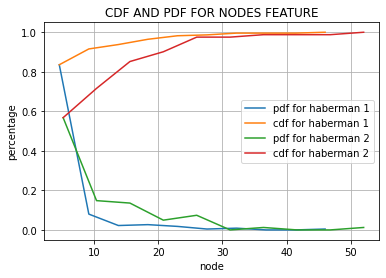

In [12]:
counts, bin_edges = np.histogram(haberman_1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf for haberman 1');
plt.plot(bin_edges[1:], cdf,label='cdf for haberman 1');
plt.legend()
plt.xlabel('node')
plt.ylabel('percentage')
plt.title('CDF AND PDF FOR NODES FEATURE')


counts, bin_edges = np.histogram(haberman_2['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf for haberman 2');
plt.plot(bin_edges[1:], cdf,label='cdf for haberman 2')
plt.legend()
plt.xlabel('node')
plt.ylabel('percentage')
plt.title('CDF AND PDF FOR NODES FEATURE')
plt.grid(True)
plt.show();

Mean Variance and Standrad Deviation

In [0]:
print("Means:")
print(np.mean(haberman_1["nodes"]))
print(np.mean(haberman_2["nodes"]))

print("\nStd-dev:");
print(np.std(haberman_1["nodes"]))
print(np.std(haberman_2["nodes"]))



BOX PLOT AND WHISKERS

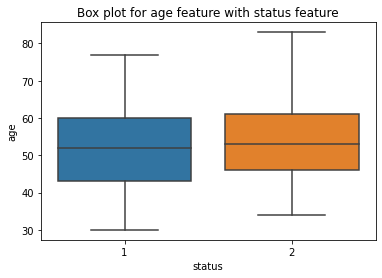

In [16]:
sns.boxplot(x='status',y='age', data=haberman)
plt.title("Box plot for age feature with status feature")
plt.show()

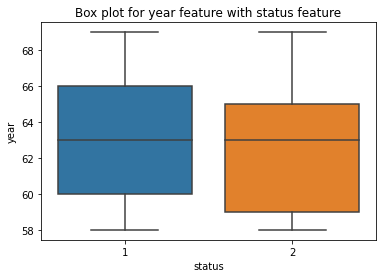

In [17]:
sns.boxplot(x='status',y='year', data=haberman)
plt.title("Box plot for year feature with status feature")
plt.show()

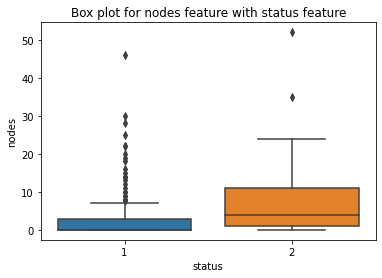

In [18]:
sns.boxplot(x='status',y='nodes', data=haberman)
plt.title("Box plot for nodes feature with status feature")
plt.show()

VIOLIN PLOT

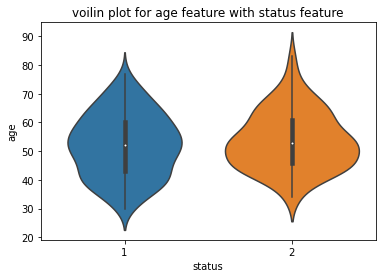

In [13]:

sns.violinplot(x="status", y="age", data=haberman, size=8)
plt.title("voilin plot for age feature with status feature")
plt.show()

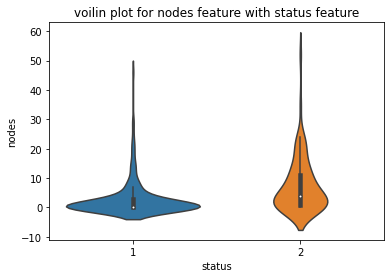

In [14]:
sns.violinplot(x="status", y="nodes", data=haberman, size=8)
plt.title("voilin plot for nodes feature with status feature")
plt.show()

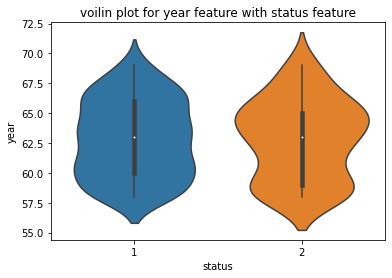

In [15]:
sns.violinplot(x="status", y="year", data=haberman, size=8)
plt.title("voilin plot for year feature with status feature")
plt.show()

2-D DENSITY PLOT,COUNTER PLOT HABERMAN 1

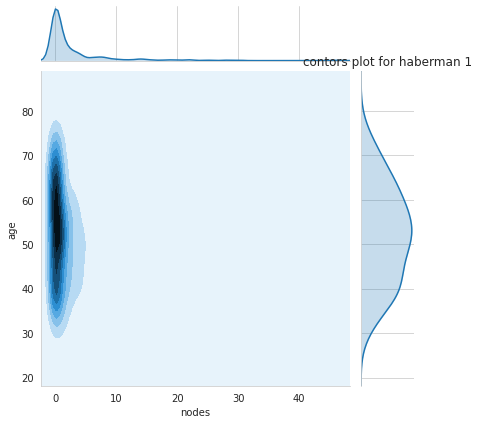

In [0]:
sns.jointplot(x="nodes", y="age", data=haberman_1, kind="kde");
plt.title("contors plot for haberman 1")
plt.show();


2-D DENSITY PLOT COUNTER PLOT FOR STATUS_2

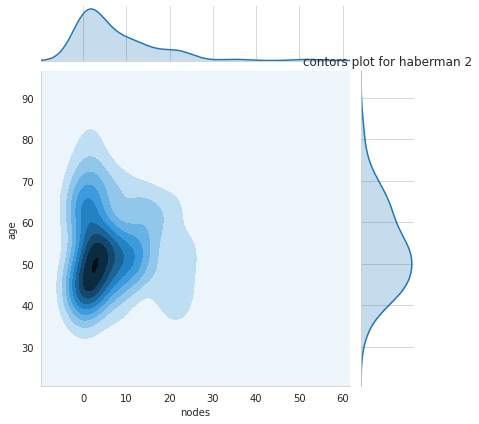

In [0]:
sns.jointplot(x="nodes", y="age", data=haberman_2, kind="kde");
plt.title("contors plot for haberman 2")
plt.show();


In [0]:
pip install plotly.express

3-D PLOT USING PLOTLY

In [0]:
import plotly.express as px
fig = px.scatter_3d(haberman, x='age', y='nodes', z='year', color='status', symbol='status') 
fig.show()

Observations:
1.Our main task is to classify the data between who had survied more than five years and who had died with in five years 

2.dataset has a shape of 4 columns(Features) and 306 rows 

3.I identified from the given dataset that survied is more than the died within five years,so we can conclude that it is an unbalanced dataset. 

4.From the probability distribution Function(PDF) for year the number of survived was highest in the years between 1958 to 1961 the count was high and the died was reported more in the years around 1964 to 1966 when comapared to other years. 

4.2. From PDF for the age 45 to 60 has both survied count and    dead count was more.

 4.3 From the CDF for status 1 we can conclude that node which   has less than 10 has 82 % or even more to survive   

4.4 From the CDF for status 2 we can conclude that node which    has more the node less is the chance to survive 

5.so we can conclude that one of the best feature among the three was Nodes. 

6.From the various plot we can say that it was very difficult to classify